In [1]:
#Description:This program uses an artificial recurrent neural network called Long Stort Term Memory(LSTM)
#            to predict the closing price of a corporation(Apple Inc.) using the past 60 day stock price.

In [8]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM


In [9]:
# Get the stock quote
df = yf.download('AAPL', start='2012-01-03', end='2019-12-18')

# Show the data
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416983,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483709,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622306,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754260,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734027,394024400
...,...,...,...,...,...,...
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.774940,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,65.942543,137310400
2019-12-13,67.864998,68.824997,67.732498,68.787498,66.838913,133587600


In [10]:
df.shape

(2003, 6)

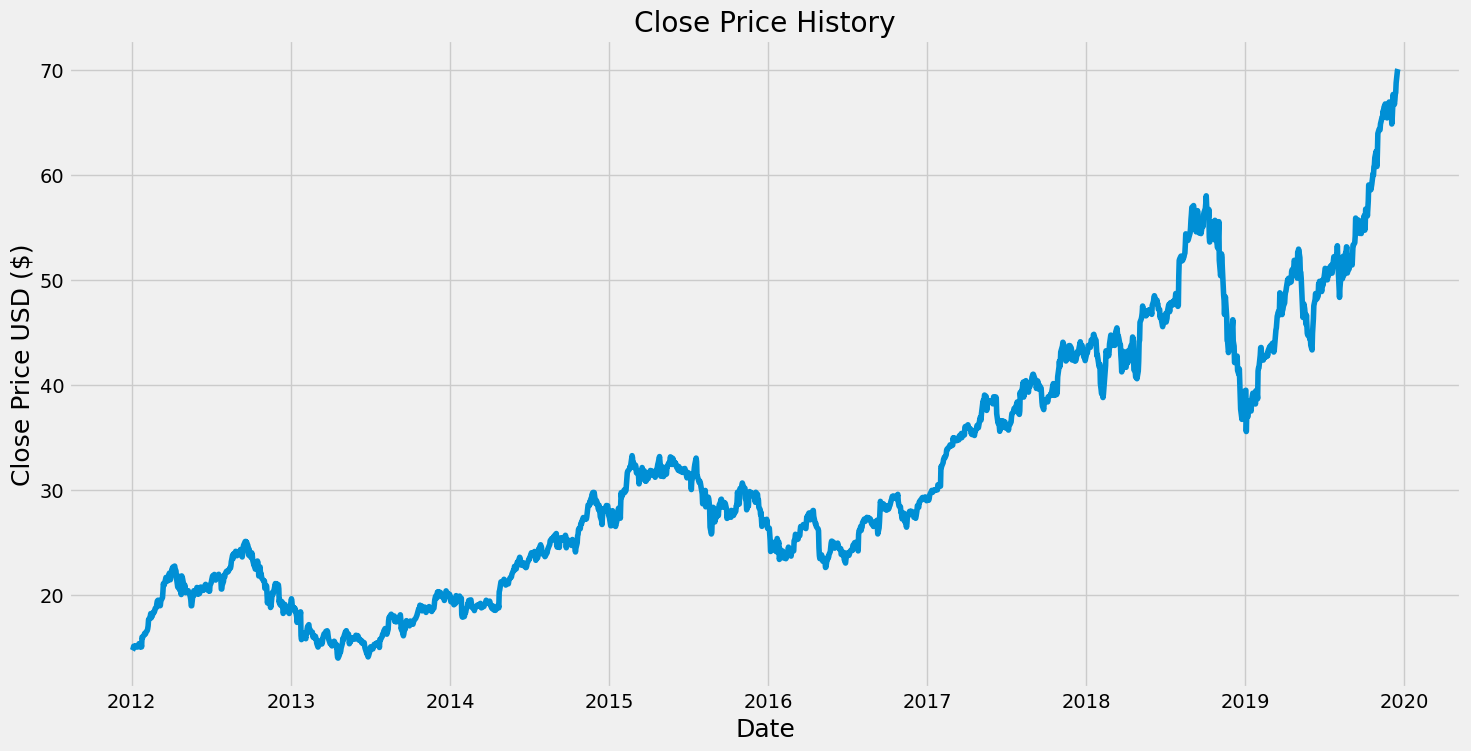

In [11]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18 )
plt.show()

In [12]:
#Create a new Dataframe with only Close column
data=pd.DataFrame(df['Close'])
#Convert Dataframe into a numpy array
dataset =np.array(data)
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1603

In [13]:
#Scale the Data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [14]:
#Create the training dataset
#Create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#Spli the data into x_train and y_train datasets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if (i<=61):
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [15]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train),np.array(y_train)

In [16]:
#Reshape the Data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [17]:
#Build the LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\abcd\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [26]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 1.3138e-04
Epoch 2/10
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 1.0986e-04
Epoch 3/10
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 1.3922e-04
Epoch 4/10
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - loss: 1.0437e-04
Epoch 5/10
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 1.3185e-04
Epoch 6/10
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - loss: 9.7725e-05
Epoch 7/10
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 1.1807e-04
Epoch 8/10
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - loss: 1.3232e-04
Epoch 9/10
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - loss: 1.1346e-04
Epoch 10/10
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - loss: 1.1263e-04


In [27]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#Create the datasets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [28]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [29]:
#Reshape the Data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [30]:
#Get the models predicted price values
predictions= model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [31]:
#get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.14218101501464844

C:\Users\abcd\AppData\Local\Temp\ipykernel_16704\1598764304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


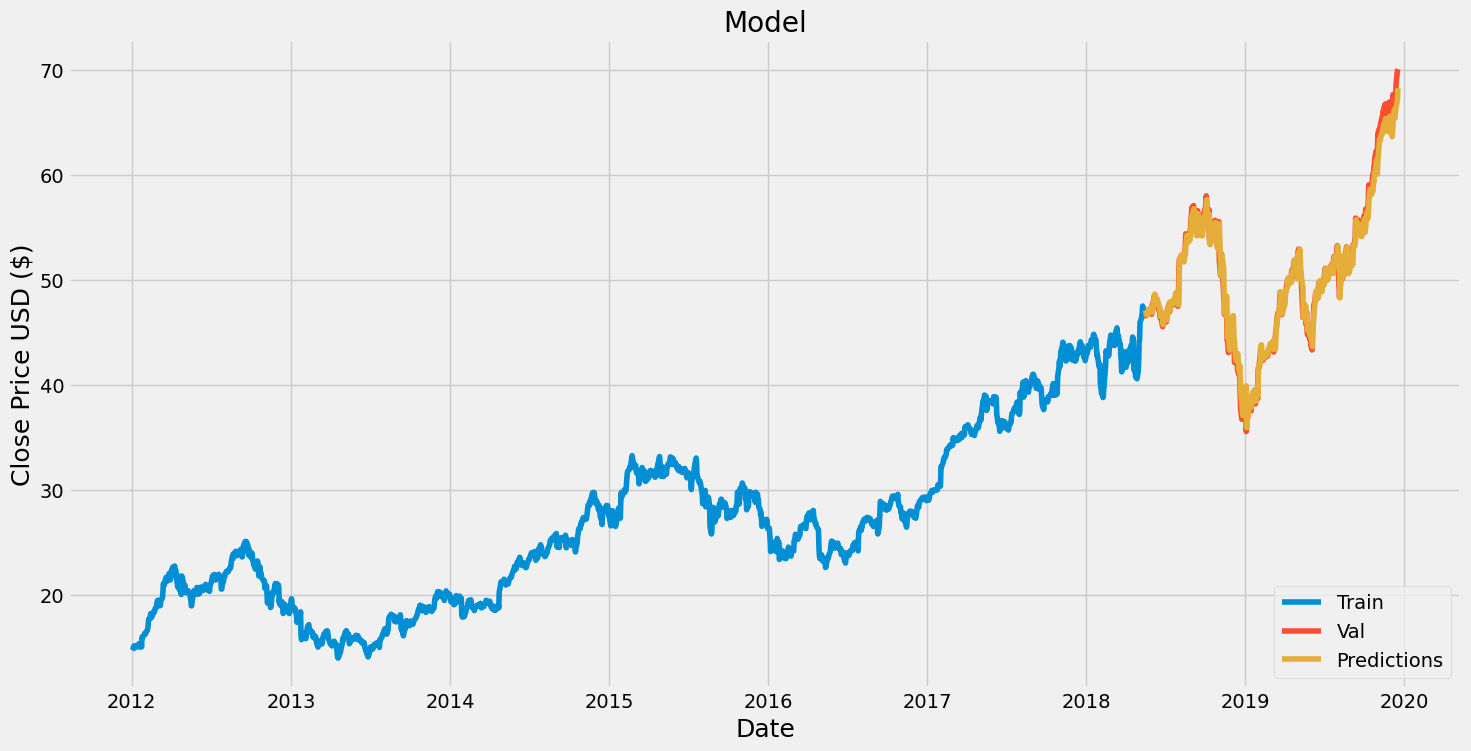

In [32]:
#Plot the Data
train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [33]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,47.087112
2018-05-18,46.577499,46.767593
2018-05-21,46.907501,46.651550
2018-05-22,46.790001,46.999752
2018-05-23,47.090000,46.889908
...,...,...
2019-12-11,67.692497,65.808624
2019-12-12,67.864998,66.261429
2019-12-13,68.787498,66.403130


In [34]:
#Get the quote
apple_quote = yf.download('AAPL', start='2012-01-03', end='2019-12-17')
#Create a new Dataframe
new_df=apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe into an array
last_60_days=new_df[-60:].values
last_60_days_scaled =scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)



[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[68.27187]]


In [35]:
#Get the quote
apple_quote2 = yf.download('AAPL', start='2019-12-18', end='2019-12-19')
apple_quote2['Close']

[*********************100%%**********************]  1 of 1 completed


Date
2019-12-18    69.934998
Name: Close, dtype: float64